<a href="https://colab.research.google.com/github/chandrusrini679/assignment-1/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

part 1

In [ ]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
x=df['Mileage']
y=df['Price']

In [ ]:
x_ols=sm.add_constant(x)
print(x_ols)

     const  Mileage
0      1.0     8221
1      1.0     9135
2      1.0    13196
3      1.0    16342
4      1.0    19832
..     ...      ...
799    1.0    16229
800    1.0    19095
801    1.0    20484
802    1.0    25979
803    1.0    35662

[804 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model=sm.OLS(y,x_ols)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           4.68e-05
Time:                        08:01:09   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.476e+04    904.363     27.383      0.000     2.3e+04    2.65e+04
Mileage       -0.1725      0.042     -4.093      0.000      -0.255      -0.090
==============================================================================
Omnibus:                      236.450   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.297
Skew:                           1.522   Prob(JB):                    3.64e-132
Kurtosis:                       5.966   Cond. No.                     5.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

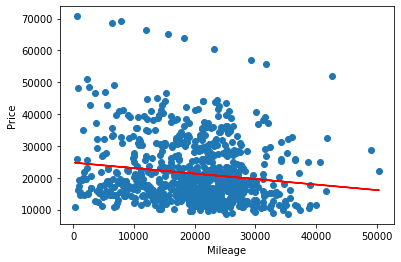

In [ ]:
plt.scatter(x,y)
yhat=2.476e+04+(-0.1725)*x
plt.plot(x,yhat,c="red")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

part 2

In [ ]:
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
price = ["Price"]

In [ ]:
X = df[features]
Y = df[price]

In [ ]:
x_ols=sm.add_constant(X)
print(x_ols)

     const  Mileage  Cylinder  Liter  Doors  Cruise  Sound  Leather
0      1.0     8221         6    3.1      4       1      1        1
1      1.0     9135         6    3.1      4       1      1        0
2      1.0    13196         6    3.1      4       1      1        0
3      1.0    16342         6    3.1      4       1      0        0
4      1.0    19832         6    3.1      4       1      0        1
..     ...      ...       ...    ...    ...     ...    ...      ...
799    1.0    16229         6    3.0      4       1      0        0
800    1.0    19095         6    3.0      4       1      1        0
801    1.0    20484         6    3.0      4       1      1        0
802    1.0    25979         6    3.0      4       1      1        0
803    1.0    35662         6    3.0      4       1      0        0

[804 rows x 8 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model1=sm.OLS(Y,x_ols)
result1=model.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     91.64
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           8.80e-98
Time:                        08:11:43   Log-Likelihood:                -8298.5
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     796   BIC:                         1.665e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6758.7551   1876.967      3.601      0.000    3074.365    1.04e+04
Mileage       -0.1697      0.032     -5.326      0.000      -0.232      -0.107
Cylinder    3792.3789    683.180      5.551      0.000    2451.332    5133.426
Liter       -787.2207    867.062     -0.908      0.364   -2489.218     914.777
Doors      -1542.7458    320.456     -4.814      0.000   -2171.784    -913.708
Cruise      6288.9971    657.992      9.558      0.000    4997.392    7580.602
Sound      -1993.7953    571.776     -3.487      0.001   -3116.162    -871.429
Leather     3349.3616    597.681      5.604      0.000    2176.144    4522.579
==============================================================================
Omnibus:                      135.077   Durbin-Watson:                   0.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.476
Skew:                           1.054   Prob(JB):                     6.63e-50
Kurtosis:                       4.523   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

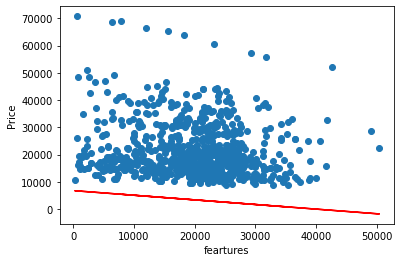

In [ ]:
plt.scatter(x,y)
yhat=	6758.7551+(-0.1697)*x
plt.plot(x,yhat,c="red")
plt.xlabel("feartures")
plt.ylabel("Price")
plt.show()

In [ ]:
result1.predict()

array([27150.72763886, 23646.21650049, 22956.87055338, 24416.63914856,
       27173.58083333, 21422.35014909, 21364.6358861 , 21298.77372716,
       26462.50716369, 23907.86504996, 25059.33929914, 22245.83174111,
       21979.83688784, 24791.60712245, 24187.47458718, 20769.19534764,
       22721.74190008, 23733.39913569, 19219.22789061, 22268.30559482,
       23280.61452701, 26357.19138006, 25714.52608685, 27344.21226219,
       23587.45584498, 26841.92842632, 23165.4627338 , 22961.42583934,
       23999.05449329, 22511.76383149, 21971.4313383 , 21889.95237878,
       24914.75614297, 26237.19874179, 25980.87951497, 22491.13643802,
       23715.48770754, 20100.13123466, 22040.11644751, 22962.31657548,
       29481.07981768, 26291.58081103, 21532.80293955, 23313.90418134,
       26288.97183066, 20596.9831399 , 20395.32271509, 20393.2857411 ,
       20323.34963418, 23271.08788249, 23693.96957793, 21626.503743  ,
       24674.56296022, 21227.59633702, 21224.03163254, 25954.56860096,
      

part 3

In [ ]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [ ]:
columns=['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x1=df_with_dummies[columns]
y1=df_with_dummies['Price']

In [ ]:
x_ols=sm.add_constant(x1)
print(x_ols)

     const  Mileage  Cylinder  Liter  Doors  Cruise  Sound  Leather
0      1.0     8221         6    3.1      4       1      1        1
1      1.0     9135         6    3.1      4       1      1        0
2      1.0    13196         6    3.1      4       1      1        0
3      1.0    16342         6    3.1      4       1      0        0
4      1.0    19832         6    3.1      4       1      0        1
..     ...      ...       ...    ...    ...     ...    ...      ...
799    1.0    16229         6    3.0      4       1      0        0
800    1.0    19095         6    3.0      4       1      1        0
801    1.0    20484         6    3.0      4       1      1        0
802    1.0    25979         6    3.0      4       1      1        0
803    1.0    35662         6    3.0      4       1      0        0

[804 rows x 8 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model2=sm.OLS(y1,x_ols)
result2=model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     91.64
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           8.80e-98
Time:                        08:29:35   Log-Likelihood:                -8298.5
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     796   BIC:                         1.665e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6758.7551   1876.967      3.601      0.000    3074.365    1.04e+04
Mileage       -0.1697      0.032     -5.326      0.000      -0.232      -0.107
Cylinder    3792.3789    683.180      5.551      0.000    2451.332    5133.426
Liter       -787.2207    867.062     -0.908      0.364   -2489.218     914.777
Doors      -1542.7458    320.456     -4.814      0.000   -2171.784    -913.708
Cruise      6288.9971    657.992      9.558      0.000    4997.392    7580.602
Sound      -1993.7953    571.776     -3.487      0.001   -3116.162    -871.429
Leather     3349.3616    597.681      5.604      0.000    2176.144    4522.579
==============================================================================
Omnibus:                      135.077   Durbin-Watson:                   0.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.476
Skew:                           1.054   Prob(JB):                     6.63e-50
Kurtosis:                       4.523   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""